In [1]:
## 1. Import Libraries & Load Synthetic Titanic-like Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Synthetic Titanic-like dataset
np.random.seed(42)
n = 300
df = pd.DataFrame({
    'Pclass': np.random.choice([1,2,3], n, p=[0.2,0.3,0.5]),
    'Sex': np.random.choice(['male','female'], n),
    'Age': np.random.normal(30,14,n).clip(0,80),
    'SibSp': np.random.randint(0,4,n),
    'Fare': np.random.normal(50,20,n).clip(5,250),
})
# Synthetic survived (not used for clustering but kept for reference exploratory)
base_prob = df['Pclass'].map({1:0.6,2:0.4,3:0.2}) + df['Sex'].map({'female':0.3,'male':-0.1}) - df['SibSp']*0.05
sig = 1/(1+np.exp(-base_prob))
df['Survived'] = (np.random.rand(n) < sig).astype(int)

In [3]:
# Add missing values to simulate cleaning practice
df.loc[np.random.rand(n)<0.1, 'Age'] = np.nan
df.loc[np.random.rand(n)<0.05, 'Fare'] = np.nan

print("Initial Missing Values:")
print(df.isna().sum())
df.head()

Initial Missing Values:
Pclass       0
Sex          0
Age         35
SibSp        0
Fare        11
Survived     0
dtype: int64


,Pclass,Sex,Age,SibSp,Fare,Survived
0,2,male,34.352706,2,64.155039,0
1,3,female,50.654987,2,38.750664,1
2,3,female,42.007235,1,62.648155,1
3,3,female,27.760861,1,69.451089,1
4,1,male,29.733773,3,62.436199,1


In [4]:
## 2. Handle Missing Values
# Fill missing age (median) & fare (mean)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

print("After Filling Missing Values:")
print(df.isna().sum())
df.head()

After Filling Missing Values:
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Survived    0
dtype: int64


C:\Users\Kushagra Bhardwaj\AppData\Local\Temp\ipykernel_48084\3031352518.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Kushagra Bhardwaj\AppData\Local\Temp\ipykernel_48084\3031352518.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

,Pclass,Sex,Age,SibSp,Fare,Survived
0,2,male,34.352706,2,64.155039,0
1,3,female,50.654987,2,38.750664,1
2,3,female,42.007235,1,62.648155,1
3,3,female,27.760861,1,69.451089,1
4,1,male,29.733773,3,62.436199,1


In [5]:
## 3. Encode Categorical Data
le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])
df.drop(columns=['Sex'], inplace=True)

df.head()

,Pclass,Age,SibSp,Fare,Survived,Sex_encoded
0,2,34.352706,2,64.155039,0,1
1,3,50.654987,2,38.750664,1,0
2,3,42.007235,1,62.648155,1,0
3,3,27.760861,1,69.451089,1,0
4,1,29.733773,3,62.436199,1,1


In [6]:
## 4. Scale Numeric Features for Clustering
X = df[['Pclass','Sex_encoded','Age','SibSp','Fare']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X.head()

,Pclass,Sex_encoded,Age,SibSp,Fare
0,2,1,34.352706,2,64.155039
1,3,0,50.654987,2,38.750664
2,3,0,42.007235,1,62.648155
3,3,0,27.760861,1,69.451089
4,1,1,29.733773,3,62.436199


In [7]:
## 5. Elbow Method to Find Optimal K
sse = []
K_range = range(1,10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    km.fit(X_scaled)
    sse.append(km.inertia_)

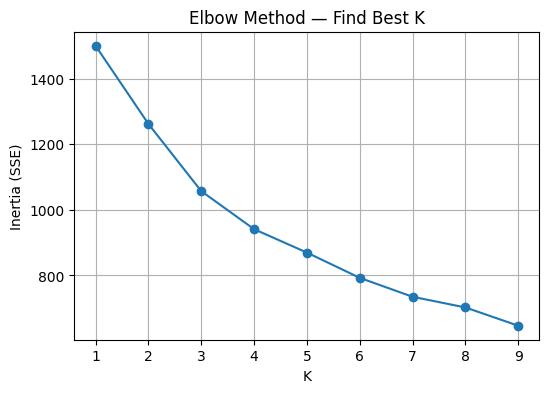

In [8]:
plt.figure(figsize=(6,4))
plt.plot(K_range, sse, marker='o')
plt.xlabel("K")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method — Find Best K")
plt.grid(True)
plt.show()

In [9]:
## 6. Train K-Means with Chosen K
best_k = 4  # assume from elbow
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_

print("Centroids:")
print(centroids)

Centroids:
[[ 0.24192914  0.96720415 -0.38431394 -0.46863736 -0.24478276]
 [-1.04667908 -1.03390789  0.11201267  0.32964904 -0.04982298]
 [-0.50992058  0.96720415  0.51824733  0.89110801  0.59905028]
 [ 0.71319972 -1.03390789  0.05051852 -0.22247108 -0.05438348]]


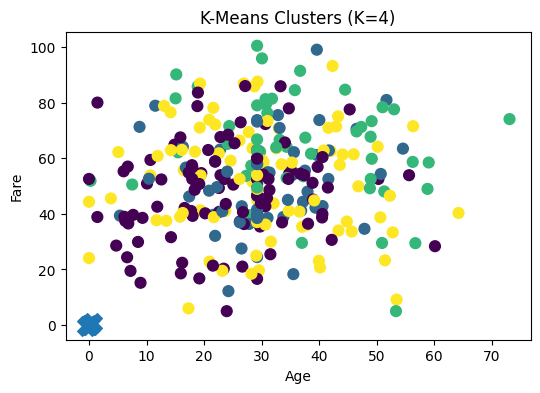

In [10]:
## 7. Visualize Clusters on 2 Feature Space for Understanding
# visualize using Age vs Fare
plt.figure(figsize=(6,4))
plt.scatter(df['Age'], df['Fare'], c=clusters, s=60)
plt.scatter(centroids[:,2], centroids[:,4], s=200, marker='X')
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title(f"K-Means Clusters (K={best_k})")
plt.show()

In [11]:
## 8. Predict Cluster for New Passenger
sample = [[3,1,25,1,20]]
pred_cluster = kmeans.predict(sample)[0]
print("Predicted Cluster:", pred_cluster)

Predicted Cluster: 2
